In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [3]:
df = pd.read_csv(r'C:\Git2025\Simple Project\simple_project\CC_Dataset.csv')


In [4]:
df_clean = df.drop('CUST_ID', axis=1)


In [5]:
df_clean.fillna(df_clean.mean(), inplace=True)


In [6]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_clean)

In [7]:
inertia = []
silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_scaled, labels))


Text(0.5, 1.0, 'Elbow Method')

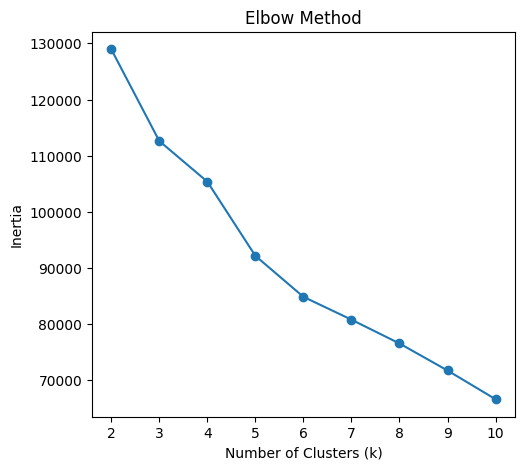

In [8]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(range(2, 11), inertia, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method")

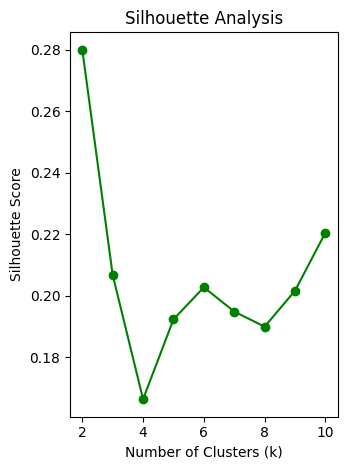

In [9]:
plt.subplot(1,2,2)
plt.plot(range(2, 11), silhouette_scores, marker='o', color='green')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Analysis")

plt.tight_layout()
plt.show()

In [10]:
best_k = 4  
kmeans = KMeans(n_clusters=best_k, random_state=42)
df['cluster'] = kmeans.fit_predict(df_scaled)


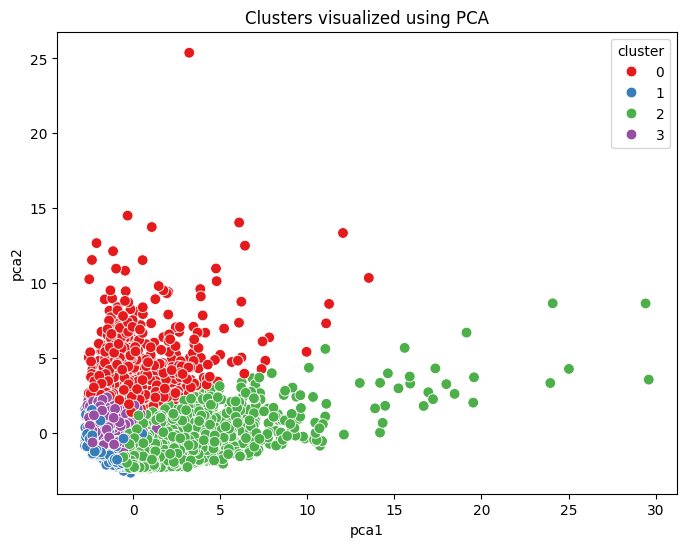

In [11]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)
df['pca1'], df['pca2'] = pca_result[:,0], pca_result[:,1]

plt.figure(figsize=(8,6))
sns.scatterplot(x='pca1', y='pca2', hue='cluster', data=df, palette='Set1', s=60)
plt.title("Clusters visualized using PCA")
plt.show()

In [12]:
cluster_profile = df.groupby('cluster')[['BALANCE','PURCHASES','CASH_ADVANCE',
                                        'CREDIT_LIMIT','PAYMENTS']].mean()

print("\nCluster Profile (Mean Values):")
print(cluster_profile)


Cluster Profile (Mean Values):
             BALANCE    PURCHASES  CASH_ADVANCE  CREDIT_LIMIT     PAYMENTS
cluster                                                                   
0        5023.958508   721.184928   5075.737329   8215.313964  4176.805950
1         109.464707   351.589913    299.684391   3628.356078  1036.107793
2        1253.422099  2181.418772    234.489319   5120.665715  2147.982881
3        1500.348531   282.216074    789.088912   3226.815035   954.225631


In [13]:
print("\nCluster Counts:")
print(df['cluster'].value_counts())


Cluster Counts:
cluster
3    3370
2    3119
1    1491
0     970
Name: count, dtype: int64
